## Cleaning and saving the data

First some imports

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

Read one raw data and print it

In [2]:
path = r"data/oben/all"
files = os.listdir(path)
pd.read_csv(os.path.join(path, files[0]), encoding="ansi")

,Time (s),AI 1/AI 1 - Trig_Blech (°C),AI 2/AI 2_Oben (°C),AI 3/AI 3_Oben (°C),AI 4/AI 4_Oben (°C),AI 5/AI 5_Oben (°C),AI 6/AI 6_Oben (°C)
0,1154.78,-173.929016,18.881292,19.039841,18.905884,18.853832,19.106617
1,1154.79,-173.886734,18.902378,18.997440,18.883671,18.842821,19.132858
2,1154.80,-173.987717,18.963287,19.049778,18.906410,18.840797,19.105967
3,1154.81,-173.899750,18.890686,19.009666,18.929417,18.854689,19.112186
4,1154.82,-173.901871,18.912983,19.052792,18.869909,18.866547,19.125011
...,...,...,...,...,...,...,...
25739,1412.17,8.511298,9.484321,9.718340,9.745791,10.567095,11.777766
25740,1412.18,8.506279,9.480468,9.692309,9.744107,10.539122,11.793945
25741,1412.19,8.571313,9.478713,9.699679,9.724430,10.559475,11.774076
25742,1412.20,8.572742,9.456875,9.713014,9.725771,10.519694,11.776561


Read all the data

In [3]:
dfs = []
for a_file in files:
	dfs.append(pd.read_csv(os.path.join(path, a_file), encoding="ansi", names=["time", "A1", "A2", "A3", "A4", "A5", "A6"], skiprows=1))

Set up the time correctly and change units for the temperature

In [4]:
for a_df in dfs:
	a_df["time"] -= a_df["time"].to_numpy()[0]
	for i in range(1, 7):
		a_df[f"A{i}"] += 273

Set up time=0 when temperature start to fall by more than 0.25K

In [5]:
theta_triger = 0.25
for a_df in dfs:
	A2_temp = a_df["A2"].to_numpy()
	trigger = np.min(np.where(A2_temp <= A2_temp[0] - theta_triger))
	a_df["time"] -= a_df["time"].to_numpy()[trigger]

Keep only the first 150s of recordings

In [6]:
max_time = 150

for i in range(len(dfs)):
	a_df = dfs[i]
	A2_temp = a_df["A2"].to_numpy()
	trigger = np.min(np.where(A2_temp <= A2_temp[0] - theta_triger))
	a_df["time"] -= a_df["time"].to_numpy()[trigger]
	dfs[i] =a_df.loc[(a_df["time"] >= 0) & (a_df["time"] <= max_time)].iloc[::100]

And then plot the data !

Text(0.5, 0, 'Time in s')

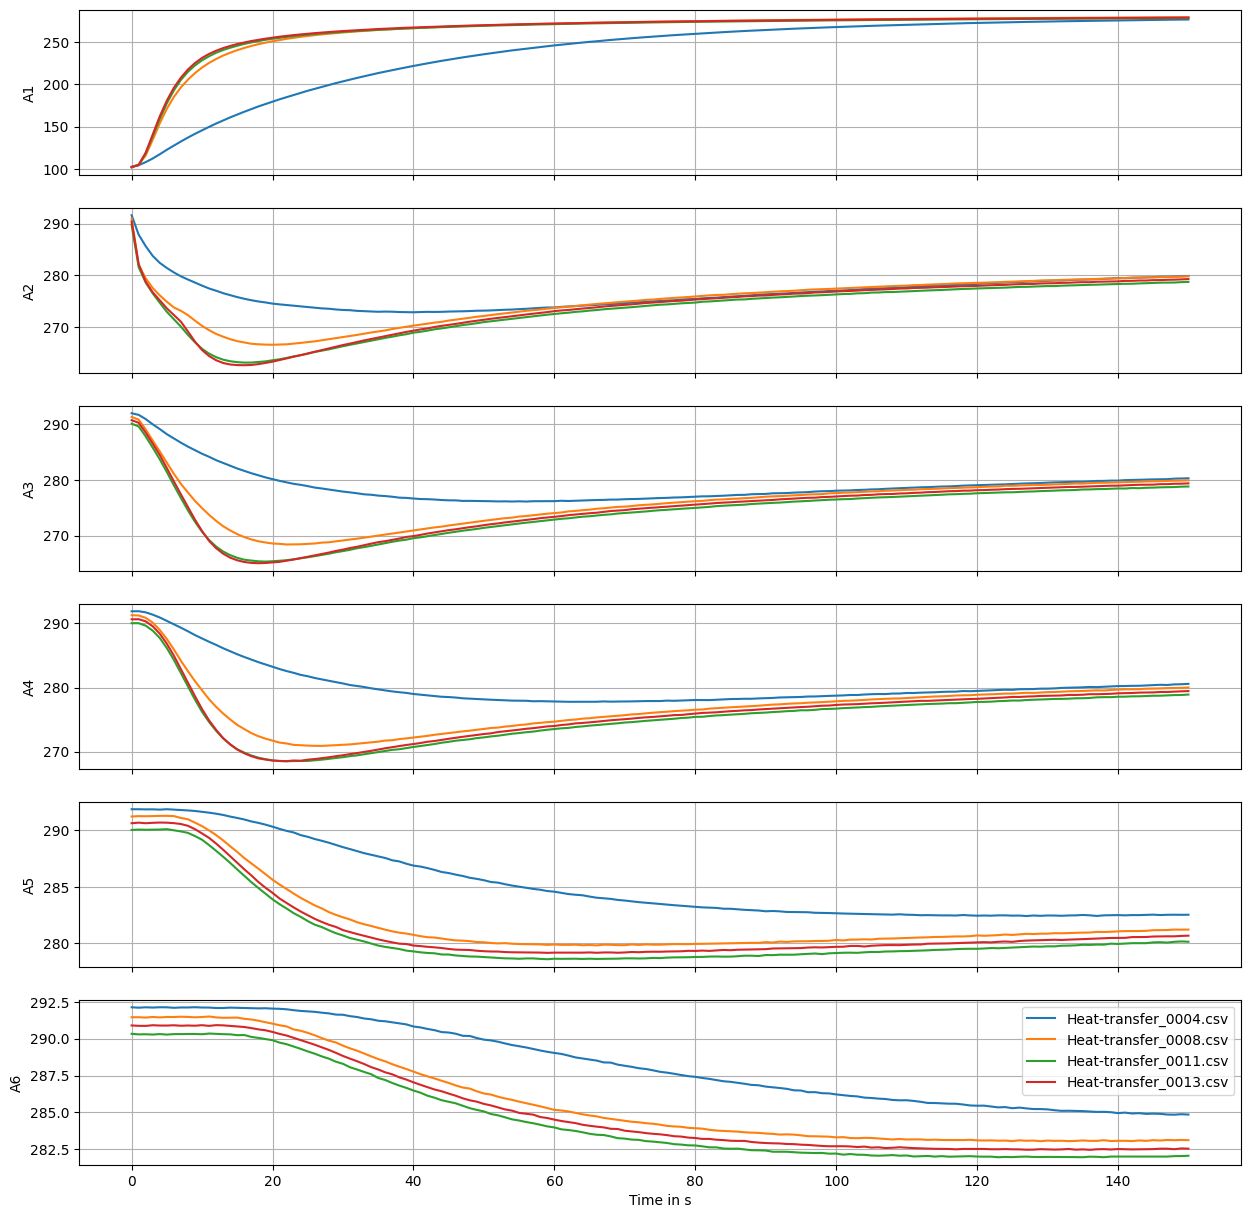

In [10]:
%matplotlib inline
fig, axs = plt.subplots(nrows=6, figsize=(15, 15), sharex=True)

for a_df, a_file in zip(dfs, files):
	for i in range(1,7):
		axs[i-1].plot(a_df["time"], a_df[f"A{i}"], label = a_file)

for i in range(6):
	axs[i].grid()
	axs[i].set_ylabel(f"A{i+1}")

axs[-1].legend()
axs[-1].set_xlabel(f"Time in s")

Finally, save the data !

In [ ]:
out_path = r"data/clean"
for a_df, a_file in zip(dfs, files):
	a_df.to_csv(os.path.join(out_path, a_file))